# Project 3: Part 2

## Specifications - Financial Data

### Functions/Imports/Test

##### Importing/checking info

In [1]:
import json
with open('/Users/cjhun/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()

dict_keys(['client-id', 'api-key'])

In [2]:
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [3]:
## make a movie object using the .Movies function from tmdb
movie = tmdb.Movies(603)

In [4]:
## movie objects have a .info dictionary 
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/oMsxZEvz9a708d49b6UdZK1KAo5.jpg',
 'belongs_to_collection': {'id': 2344,
  'name': 'The Matrix Collection',
  'poster_path': '/bV9qTVHTVf0gkW0j7p7M0ILD4pG.jpg',
  'backdrop_path': '/bRm2DEgUiYciDw3myHuYFInD7la.jpg'},
 'budget': 63000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.warnerbros.com/matrix',
 'id': 603,
 'imdb_id': 'tt0133093',
 'original_language': 'en',
 'original_title': 'The Matrix',
 'overview': 'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 'popularity': 85.7,
 'poster_path': '/f89U3ADr1oiB1s9GkdPOEpXUk5H.jpg',
 'production_companies': [{'id': 79,
   'logo_path': '/tpFpsqbleCzEE2p5EgvUq6ozfCA.png',
   'name': 'Village Roadshow Pictures',
   'origin_country': 'US'},
  {'id': 372,
   'logo_path': None,
   'name': 'Groucho II Film P

In [5]:
# check for the budget
info['budget']

63000000

In [6]:
# check the revenue
info['revenue']

463517383

In [7]:
# check the id
info['imdb_id']

'tt0133093'

##### Searching with IMDB_ID

In [8]:
movie = tmdb.Movies('tt1361336')
info = movie.info()
info['budget']

50000000

##### Saving the Movie Certification/MPAA Rating

In [9]:
# example from package README
# source - https:github.com/celiao/tmdbsimple
releases = movie.releases()
for c in releases['countries']:
    if c['iso_3166_1'] == 'US':
        print(c['certification'])

PG
PG
PG


In [10]:
# Get the movie object for the current id
movie = tmdb.Movies('tt1361336')
# save the .info .releases dictionaries
info = movie.info()
releases = movie.releases()
# Loop through countries in releases
for c in releases['countries']:
    # if the country abbreviation==US
    if c['iso_3166_1' ] =='US':
        ## save a "certification" key in the info dict with the certification
       info['certification'] = c['certification']

##### Testing our Function

In [11]:
def get_movie_with_rating(movie_id):
    """Adapted from source = https://github.com/celiao/tmdbsimple"""
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    
    # save the .info .releases dictionaries
    info = movie.info()
    
    releases = movie.releases()
    # loop through the countries in releases
    for c in releases['countries']:
        # if the country abbreviation == 'US'
        if c['iso_3166_1'] == 'US':
            # save a certification key in info with the certification
            info['certification'] = c['certification']
    return info

In [12]:
test = get_movie_with_rating('tt0848228')

##### Looping thorough testing

##### Defining Our Function

In [13]:
## testing our function by looping through a list of ids
import pandas as pd
test_ids = ["tt0848228", "tt0115937","tt0848228","tt0332280"]
results = []
for movie_id in test_ids:
    # implementing a try and pass option for those movies that don't exist in the db 
    try:
        movie_info = get_movie_with_rating(movie_id)
        results.append(movie_info)
        
    except: 
        pass
    
pd.DataFrame(results)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.70,29080,PG-13
1,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.70,29080,PG-13
2,False,/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg,None,29000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",http://www.newline.com/properties/notebookthe....,11036,tt0332280,en,The Notebook,...,115603229,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Behind every great love is a great story.,The Notebook,False,7.88,10549,PG-13


In [14]:
def get_movie_with_rating(movie_id):
    """Adapted from source = https://github.com/celiao/tmdbsimple"""
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    
    # save the .info .releases dictionaries
    info = movie.info()
    
    releases = movie.releases()
    # loop through the countries in releases
    for c in releases['countries']:
        # if the country abbreviation == 'US'
        if c['iso_3166_1'] == 'US':
            # save a certification key in info with the certification
            info['certification'] = c['certification']
    return info

Saving the error message in a list

In [15]:
## testing our function by looping through a list of ids
import pandas as pd
test_ids = ["tt0848228", "tt0115937","tt0848228","tt0332280"]
results = []
errors = []
for movie_id in test_ids:
    
    try:
        movie_info = get_movie_with_rating(movie_id)
        results.append(movie_info)
        
    except Exception as e: 
        errors.append([movie_id, e])
    
pd.DataFrame(results)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.70,29080,PG-13
1,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.70,29080,PG-13
2,False,/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg,None,29000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",http://www.newline.com/properties/notebookthe....,11036,tt0332280,en,The Notebook,...,115603229,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Behind every great love is a great story.,The Notebook,False,7.88,10549,PG-13


In [16]:
# Checking for the number of errors
print(f"- Number of errors: {len(errors)}")
errors

- Number of errors: 1


[['tt0115937',
  requests.exceptions.HTTPError('404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0115937?api_key=bafdcebd08fde9b6ccdab643bc7c7d75')]]

In [17]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Additional Imports
import os, json, math, time
import tmdbsimple as tmdb 
from tqdm.notebook import tqdm_notebook
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'ratings_filtered.csv.gz',
 'title-akas-us-only.csv',
 'title.basics.tsv.gz',
 'title.ratings.tsv.gz',
 'title_basics.csv.gz',
 'title_basics_filtered.csv.gz']

##### Functions

In [18]:
def get_movie_with_rating(movie_id):
    """Adapted from source = https://github.com/celiao/tmdbsimple"""
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    
    # save the .info .releases dictionaries
    info = movie.info()
    
    releases = movie.releases()
    # loop through the countries in releases
    for c in releases['countries']:
        # if the country abbreviation == 'US'
        if c['iso_3166_1'] == 'US':
            # save a certification key in info with the certification
            info['certification'] = c['certification']
    return info

In [19]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [20]:
# Define a function to add results to the DataFrame
def add_results_to_dataframe(movie_info, imdb_id):
    budget = movie_info.get('budget', np.nan)
    revenue = movie_info.get('revenue', np.nan)
    certification = movie_info.get('certification', np.nan)
    
    results_df.loc[len(results_df)] = [imdb_id, budget, revenue, certification]

In [21]:
# Load in the dataframe from project part 1 as basics:
basics = pd.read_csv('Data/title_basics_filtered.csv.gz')

In [22]:
# Define a list of the Years to Extract from the API
YEARS_TO_GET = [2000,2001]

In [23]:
# defining an error list 
errors = [ ]

In [24]:
# Standard Imports
import numpy as np
import pandas as pd
import os
import json
import math
import time
import tmdbsimple as tmdb
from tqdm.notebook import tqdm_notebook

# Set up the API key
with open('/Users/cjhun/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
tmdb.API_KEY = login['api-key']

# Function to get movie details with budget, revenue, and certification
def get_movie_with_rating(movie_id):
    """Adapted from source: https://github.com/celiao/tmdbsimple"""
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    
    # save the .info .releases dictionaries
    info = movie.info()
    
    releases = movie.releases()
    
    # Loop through countries in releases
    for c in releases['countries']:
        # If the country abbreviation == 'US'
        if c['iso_3166_1'] == 'US':
            # Save a "certification" key in info with the certification
            info['certification'] = c['certification']
    
    return info

# Create a folder to store data
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)

# Load in the dataframe from project part 1 as basics
basics = pd.read_csv('Data/title_basics_filtered.csv.gz')

# Define a list of the Years to Extract from the API
YEARS_TO_GET = [2000, 2001]

# Initialize a DataFrame to store the results
results_df = pd.DataFrame(columns=['imdb_id', 'budget', 'revenue', 'certification'])

### Loops

In [25]:
# Test the API function with provided movie IDs
test_movie_ids = ["tt0848228", "tt0332280"]
for movie_id in test_movie_ids:
    try:
        test_info = get_movie_with_rating(movie_id)
        print(f"Movie ID: {movie_id}")
        print(test_info)
    except Exception as e:
        print(f"Error for Movie ID {movie_id}: {e}")

# Loop through the years
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    # Define the JSON file to store results for the year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    # Check if the file exists
    file_exists = os.path.isfile(JSON_FILE)
    
    # If it does not exist, create it with an empty dict
    if file_exists == False:
        with open(JSON_FILE, 'w') as f:
            json.dump([{'imdb_id': 0}], f)
    
    # Save movies for the current year as the current DataFrame
    df = basics.loc[basics['startYear'] == YEAR].copy()
    
    # Save movie IDs to a list
    movie_ids = df['tconst'].copy()
    
    # Load existing data from JSON into a DataFrame called 'previous_df'
    previous_df = pd.read_json(JSON_FILE)
    
    # Filter out any IDs that are already in the JSON_FILE
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]
    
    # Get movie details for each movie ID
    for movie_id in tqdm_notebook(movie_ids_to_get, desc=f'Movies from {YEAR}', position=1, leave=True):
        try:
            temp = get_movie_with_rating(movie_id)
            add_results_to_dataframe(temp, movie_id)  # Add results to DataFrame
            write_json(temp, JSON_FILE)
            time.sleep(0.02)
        except Exception as e:
            continue

    # Save the results DataFrame to a CSV file for the current year
    results_df.to_csv(f"{FOLDER}tmdb_results_{YEAR}.csv.gz", compression="gzip", index=False, encoding='utf-8')

    
    # Clear the results DataFrame for the next year
    results_df = pd.DataFrame(columns=['imdb_id', 'budget', 'revenue', 'certification'])


Movie ID: tt0848228
{'adult': False, 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg', 'belongs_to_collection': {'id': 86311, 'name': 'The Avengers Collection', 'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg', 'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'}, 'budget': 220000000, 'genres': [{'id': 878, 'name': 'Science Fiction'}, {'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}], 'homepage': 'https://www.marvel.com/movies/the-avengers', 'id': 24428, 'imdb_id': 'tt0848228', 'original_language': 'en', 'original_title': 'The Avengers', 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!', 'popularity': 115.39, 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg', 'production_companies': [{'id': 420, 'logo_path': '/hU

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Movies from 2000:   0%|          | 0/1458 [00:00<?, ?it/s]

Movies from 2001:   0%|          | 0/1576 [00:00<?, ?it/s]

## Exploratory Data Analysis

#### Calculations

In [26]:
# Concatenate the data from all years into one DataFrame
concatenated_df = pd.concat([pd.read_csv(f"{FOLDER}tmdb_results_{YEAR}.csv.gz") for YEAR in YEARS_TO_GET], ignore_index=True)

#Check how many movies had at least some valid financial information (values > 0 for budget OR revenue)
valid_financial_info_movies = concatenated_df[(concatenated_df['budget'] > 0) | (concatenated_df['revenue'] > 0)]
num_valid_financial_info_movies = len(valid_financial_info_movies)
print(f"Number of movies with valid financial information: {num_valid_financial_info_movies}")

# Exclude movies with 0's for budget AND revenue from the remaining visualizations
valid_budget_revenue_movies = concatenated_df[(concatenated_df['budget'] > 0) | (concatenated_df['revenue'] > 0)]

# Count the number of movies in each certification category (G/PG/PG-13/R)
certification_counts = valid_budget_revenue_movies['certification'].value_counts()
print("\nNumber of movies in each certification category:")
print(certification_counts)

# Calculate the average revenue and budget per certification category
average_revenue_per_certification = valid_budget_revenue_movies.groupby('certification')['revenue'].mean()
average_budget_per_certification = valid_budget_revenue_movies.groupby('certification')['budget'].mean()

print("\nAverage revenue per certification category:")
print(average_revenue_per_certification)

print("\nAverage budget per certification category:")
print(average_budget_per_certification)

Number of movies with valid financial information: 644

Number of movies in each certification category:
R        231
PG-13    131
PG        35
NR        20
G         15
Name: certification, dtype: int64

Average revenue per certification category:
certification
G        1.173648e+08
NR       1.766105e+07
PG       1.106791e+08
PG-13    9.928786e+07
R        3.002185e+07
Name: revenue, dtype: float64

Average budget per certification category:
certification
G        3.813333e+07
NR       1.014175e+07
PG       4.482849e+07
PG-13    4.299357e+07
R        1.875673e+07
Name: budget, dtype: float64


#### Visuals

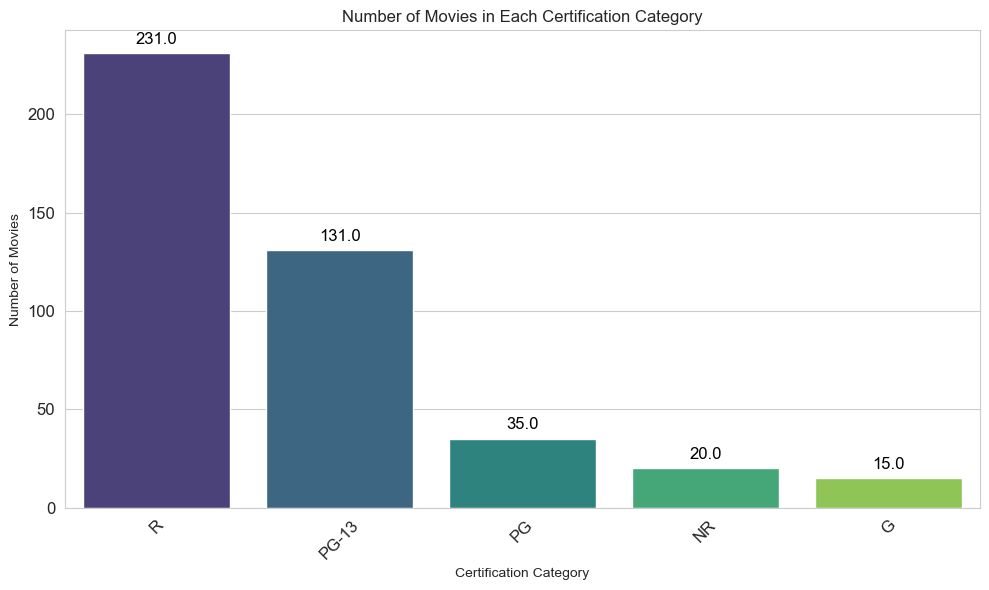

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of movies in each certification category
certification_counts = valid_budget_revenue_movies['certification'].value_counts()

# Create a bar plot with custom style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Apply a white grid background
plot = sns.barplot(x=certification_counts.index, y=certification_counts.values, palette='viridis')

# Add annotations (labels) to the bars
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                  textcoords='offset points')

plt.xlabel('Certification Category')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Certification Category')
plt.xticks(rotation=45, fontsize=12)  # Increase x-axis label font size
plt.yticks(fontsize=12)  # Increase y-axis label font size
plt.tight_layout()
plt.show()

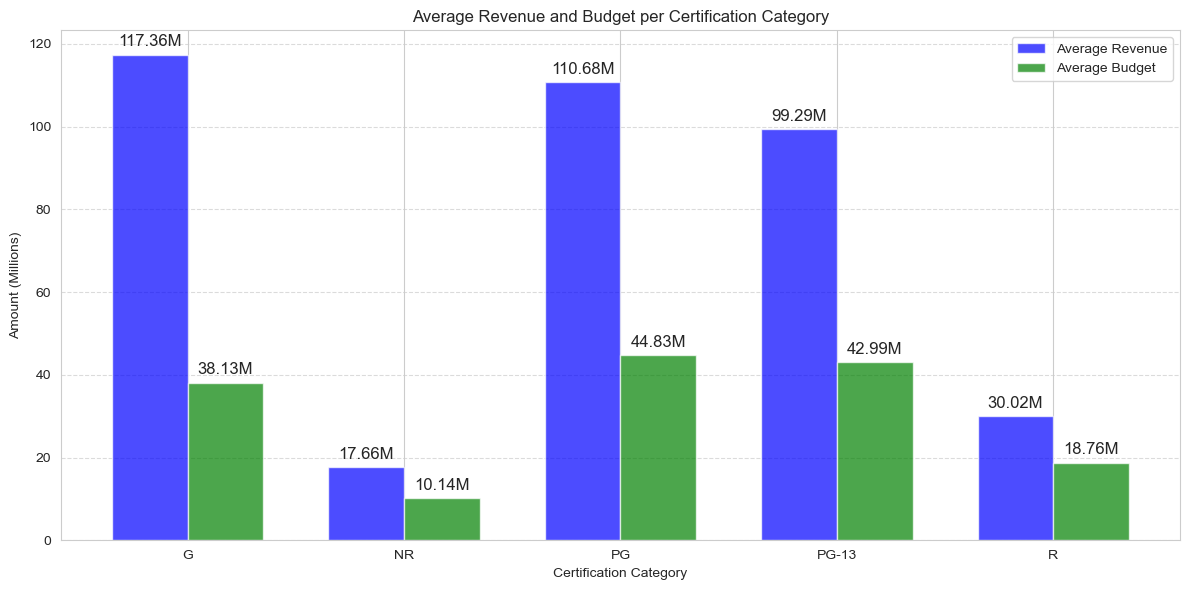

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
certifications = ['G', 'NR', 'PG', 'PG-13', 'R']
average_revenue_millions = [117.3648, 17.66105, 110.6791, 99.28786, 30.02185]  # Average revenue in millions
average_budget_millions = [38.13333, 10.14175, 44.82849, 42.99357, 18.75673]  # Average budget in millions

# Create a figure and axis with specified size
fig, ax = plt.subplots(figsize=(12, 6))

# Define bar width and x-axis positions
bar_width = 0.35
index = np.arange(len(certifications))

# Create grouped bar plots for average revenue and average budget
bar1 = ax.bar(index - bar_width/2, average_revenue_millions, bar_width, label='Average Revenue', color='b', alpha=0.7)
bar2 = ax.bar(index + bar_width/2, average_budget_millions, bar_width, label='Average Budget', color='g', alpha=0.7)

# Add data labels above the bars
for x, y1, y2 in zip(index, average_revenue_millions, average_budget_millions):
    ax.text(x - bar_width/2, y1 + 2, f'{y1:.2f}M', ha='center', fontsize=12)
    ax.text(x + bar_width/2, y2 + 2, f'{y2:.2f}M', ha='center', fontsize=12)

# Set axis labels and title
ax.set_xlabel('Certification Category')
ax.set_ylabel('Amount (Millions)')
ax.set_title('Average Revenue and Budget per Certification Category')

# Customize tick positions and labels
ax.set_xticks(index)
ax.set_xticklabels(certifications)
ax.legend()

# Improve the layout and appearance
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.show()


## Saving the concatenated DataFrame

In [29]:
# Save the concatenated DataFrame as a compressed CSV file
concatenated_df.to_csv('tmdb_results_combined.csv.gz', compression='gzip', index=False)